## Property Value

In [11]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

#import data from csv
dtype = {'user_id': int}
transactions = pd.read_csv("https://data.wprdc.org/datastore/dump/5bbe6c55-bce6-4edb-9d04-68edeb6bf7b1")

#drop irrelevant columns and only locate houses in Pitt
transactions = transactions.drop(columns = ["PARID", "PROPERTYHOUSENUM", 'PROPERTYFRACTION', 'PROPERTYADDRESSDIR', 
                                            'PROPERTYADDRESSUNITDESC', 'PROPERTYUNITNO', 'PROPERTYSTATE', 'SCHOOLCODE', 
                                            'SCHOOLDESC', 'MUNICODE', 'RECORDDATE', 'DEEDBOOK', 'DEEDPAGE', 'SALECODE', 
                                            'SALEDESC', 'INSTRTYP', 'INSTRTYPDESC'])
transactions = transactions.loc[transactions["PROPERTYCITY"] == 'PITTSBURGH']

#match wards with neighborhood names (courtesy of https://apps.alleghenycounty.us/website/munipgh.asp)
transactions = transactions.replace({       "1st Ward - PITTSBURGH": "Lower Hill District 1",
                                            "2nd Ward - PITTSBURGH": "Strip District", 
                                            "3rd Ward - PITTSBURGH": "Lower Hill District 2", 
                                            "4th Ward - PITTSBURGH": "Oakland - Soho", 
                                            "5th Ward - PITTSBURGH": "Upper Hill District", 
                                            "6th Ward - PITTSBURGH": "Polish Hill", 
                                            "7th Ward - PITTSBURGH": "Shadyside", 
                                            "8th Ward - PITTSBURGH": "Bloomfield", 
                                            "9th Ward - PITTSBURGH": "Lawrenceville", 
                                            "10th Ward - PITTSBURGH": "Morningside, Garfield", 
                                            "11th Ward - PITTSBURGH": "East End Mall/Highland Park", 
                                            "12th Ward - PITTSBURGH": "East Liberty", 
                                            "13th Ward - PITTSBURGH": "Homewood", 
                                            "14th Ward - PITTSBURGH": "Point Breeze/Squirrel Hill/Frick Park", 
                                            "15th Ward - PITTSBURGH": "Hazelwood/Greenfield", 
                                            "16th Ward - PITTSBURGH": "Parts of Southside", 
                                            "17th Ward - PITTSBURGH": "Parts of Southside", 
                                            "18th Ward - PITTSBURGH": "Allentown/Beltzhoover", 
                                            "19th Ward - PITTSBURGH": "Brookline/Mt. Washington/Beechview", 
                                            "20th Ward - PITTSBURGH": "West End/Corliss", 
                                            "21st Ward - PITTSBURGH": "Manchester", 
                                            "22nd Ward - PITTSBURGH": "North Side", 
                                            "23rd Ward - PITTSBURGH": "Latimer Jr High - Heinz Co. Area", 
                                            "24th Ward - PITTSBURGH": "Troy Hill/Spring Garden", 
                                            "25th Ward - PITTSBURGH": "Fineview", 
                                            "26th Ward - PITTSBURGH": "Perrysville/Riverview", 
                                            "27th Ward - PITTSBURGH": "Woods Run/Brighton Road", 
                                            "28th Ward - PITTSBURGH": "Chartiers/Westwood/Esplen/Crafton Hts.", 
                                            "29th Ward - PITTSBURGH": "Carrick", 
                                            "30th Ward - PITTSBURGH": "Knoxville", 
                                            "31st Ward - PITTSBURGH": "Hays/Lincoln Place", 
                                            "32nd Ward - PITTSBURGH": "Overbrooke"})
#drop prices not correlating to property in residential areas
transactions = transactions[transactions["PRICE"] > 10000]

#chart
pdtransactions = pd.DataFrame(transactions)
pdtransactions.head(10)


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SALEDATE,PRICE
4,CARNEGIE,ST,PITTSBURGH,15201.0,"Morningside, Garfield",2015-02-04,27541.0
11,BOGGSTON,AVE,PITTSBURGH,15210.0,Allentown/Beltzhoover,2020-07-09,10500.0
18,WILTSIE,ST,PITTSBURGH,15206.0,East Liberty,2017-05-09,30000.0
21,CHURCH,ST,PITTSBURGH,15218.0,Swissvale,2017-09-29,2000000.0
25,SMITHFIELD,ST,PITTSBURGH,15222.0,Strip District,2012-08-16,630000.0
32,DAWSON,ST,PITTSBURGH,15213.0,Oakland - Soho,2013-04-23,157000.0
33,TRAYMORE,AVE,PITTSBURGH,15216.0,Brookline/Mt. Washington/Beechview,2019-03-06,18000.0
34,TRAYMORE,AVE,PITTSBURGH,15216.0,Brookline/Mt. Washington/Beechview,2019-03-06,18000.0
35,TRAYMORE,AVE,PITTSBURGH,15216.0,Brookline/Mt. Washington/Beechview,2019-03-06,18000.0
37,SHARON,DR,PITTSBURGH,15221.0,Forest Hills,2012-04-17,63000.0


<AxesSubplot:title={'center':'Number of Sales by Neighborhood'}, xlabel='Number of Sales', ylabel='sold property #'>

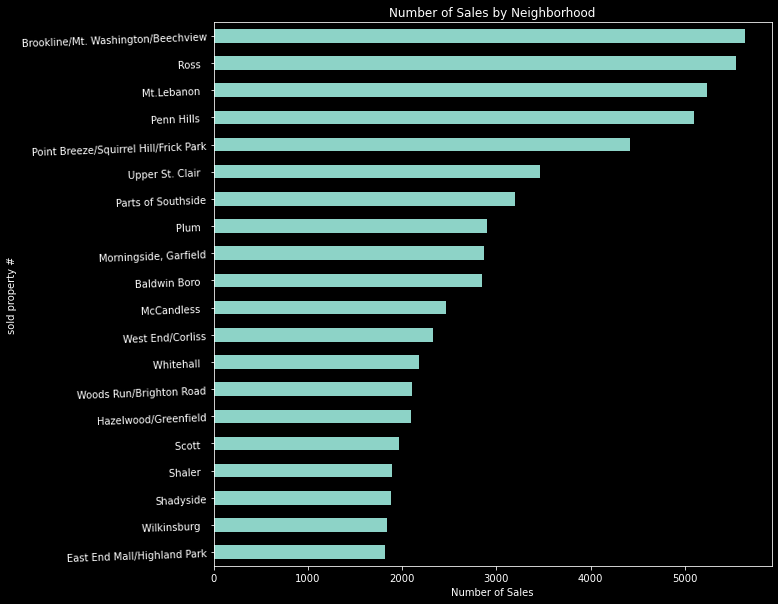

In [18]:
#group data by neighborhood & count number of sales in each
numberOfSales = transactions.loc[transactions["PRICE"] >= 10000].groupby("MUNIDESC").size().sort_values()

#set up graph
plt.xlabel("Number of Sales")
plt.ylabel("Neighborhood")
plt.style.use("dark_background")

#top 20 neighborhoods with the highest sale number
numberOfSales.tail(20).plot(kind = "barh", title = "Number of Sales by Neighborhood", 
                           ylabel = "neighborhood", xlabel = "sold property #", rot = 2, fontsize = 10, figsize = (10,10))


<AxesSubplot:title={'center':'Number of Sales by Neighborhood'}, ylabel='Sold Property #'>

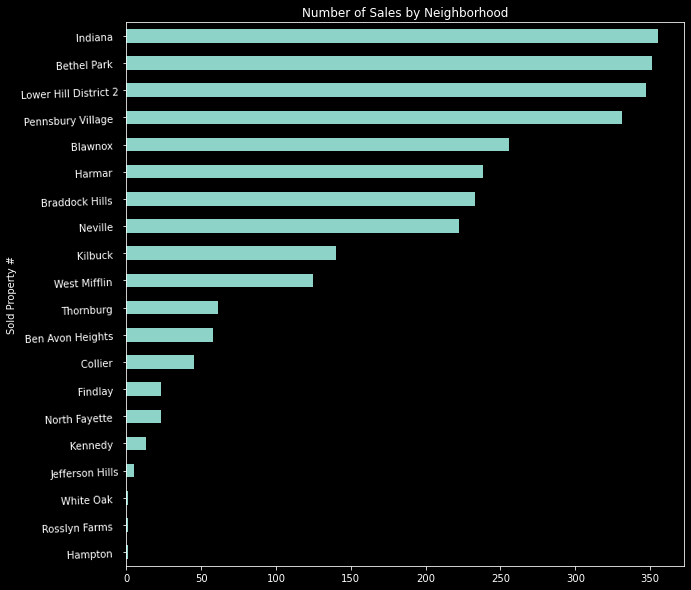

In [13]:
#top 20 neighborhoods with the lowest sale number
numberOfSales.head(20).plot(kind = "barh", title = "Number of Sales by Neighborhood",  
                            ylabel = "Neighborhood", xlabel = "Sold Property #", rot = 2, fontsize = 10, figsize = (10,10))

In [14]:
#sum of prices by neighborhood
theSum = transactions.groupby("MUNIDESC")["PRICE"].sum()
theSum = theSum.astype(int)
print(theSum)

MUNIDESC
1st Ward  - PITTSBURGH      624166477
Allentown/Beltzhoover       151477080
Aspinwall                   151575696
Avalon                      111002880
Baldwin Boro                417966838
                              ...    
White Oak                      600000
Whitehall                   415472058
Wilkins                    1077772307
Wilkinsburg                 227571651
Woods Run/Brighton Road     229137372
Name: PRICE, Length: 91, dtype: int64


In [15]:
#number of sales by neighborhood
print(numberOfSales)

MUNIDESC
Hampton                                     1
Rosslyn Farms                               1
White Oak                                   1
Jefferson Hills                             5
Kennedy                                    13
                                         ... 
Point Breeze/Squirrel Hill/Frick Park    4419
Penn Hills                               5097
Mt.Lebanon                               5232
Ross                                     5538
Brookline/Mt. Washington/Beechview       5639
Length: 91, dtype: int64


In [22]:
#find average price of each neighborhood
avg_price = theSum / numberOfSales
avg_price = avg_price.astype(int)

pdavg_price = pd.DataFrame(avg_price)
pdavg_price.head(60)

,0
MUNIDESC,
1st Ward - PITTSBURGH,1402621
Allentown/Beltzhoover,115808
Aspinwall,287619
Avalon,122926
Baldwin Boro,146706
Baldwin Twp,132943
Bellevue,148124
Ben Avon,217802
Ben Avon Heights,389352


In [ ]:
plt.style.use("seaborn-dark-palette")
avg_price.head(90).plot(kind = 'barh', title = "Average Price Per Neighborhood", 
                        ylabel = "Average $ (in scientific notation)", xlabel = "Neighborhoods", rot = 2, fontsize = 17, figsize = (25,25))